<a href="https://colab.research.google.com/github/belllaw/AiCollabo/blob/modeling/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y

!pip install tensorflow==2.3.0
!pip install keras==2.4


Found existing installation: keras 2.9.0
Uninstalling keras-2.9.0:
  Successfully uninstalled keras-2.9.0
Found existing installation: Keras-Preprocessing 1.1.2
Uninstalling Keras-Preprocessing-1.1.2:
  Successfully uninstalled Keras-Preprocessing-1.1.2
Found existing installation: keras-vis 0.4.1
Uninstalling keras-vis-0.4.1:
  Successfully uninstalled keras-vis-0.4.1
Found existing installation: tensorflow 2.9.2
Uninstalling tensorflow-2.9.2:
  Successfully uninstalled tensorflow-2.9.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.0/26.0 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 KB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.5 MB/s eta 0:00:00
    

In [38]:
import pandas as pd
import numpy as np
from scipy.io import arff
import tensorflow
import keras
import sys
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, GlobalMaxPooling1D
from keras.layers import BatchNormalization, ReLU
import tensorflow.keras.optimizers

In [39]:
train = arff.loadarff("FordA_TRAIN.arff")
test = arff.loadarff("FordA_TEST.arff")

data_train = pd.DataFrame(train[0])
data_test = pd.DataFrame(test[0])

data_train['target'].values
data_train.iloc[:,:-1]

X = data_train.iloc[:,:-1]
Y = data_train.iloc[:,-1]


In [40]:
from sklearn.model_selection import train_test_split
target = data_train['target']
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, 
                                                    test_size = 0.2,
                                                    random_state = 83,
                                                   stratify = Y)


In [41]:
x_test = data_test.iloc[:,:-1]
y_test = data_test.iloc[:,-1]

In [15]:
corr_df = X.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))
corr_df

pd.options.display.max_rows = 60
pd.options.display.max_columns = 20


In [59]:
y_train[y_train == b'-1'] = 0
y_valid[y_valid == b'-1'] = 0
y_test[y_test == b'-1'] = 0

y_train[y_train == b'1'] = 1
y_valid[y_valid == b'1'] = 1
y_test[y_test == b'1'] = 1

<ipython-input-59-718de30015ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test[y_test == b'-1'] = 0
<ipython-input-59-718de30015ea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test[y_test == b'1'] = 1


In [60]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(x_train)

x_train = std.transform(x_train)
x_valid = std.transform(x_valid)

x_train.shape

(2880, 500)

In [61]:
x_train_c = np.expand_dims(x_train, -1)
x_valid_c = np.expand_dims(x_valid, -1)
x_test_c = np.expand_dims(x_test, -1)


In [63]:
y_train = y_train.astype(np.float32)
y_valid = y_valid.astype(np.float32)

In [64]:
model = Sequential()

model.add(Conv1D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(ReLU())

model.add(Conv1D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(ReLU())

model.add(Conv1D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(ReLU())

model.add(Conv1D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(ReLU())

model.add(GlobalMaxPooling1D())
model.add(Dense(2, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

history = model.fit(x_train_c, y_train,
                    batch_size = 64,
                    epochs = 300,
                    validation_data = (x_valid_c, y_valid), verbose = 1)



Epoch 1/300
45/45 [==============================] - 14s 307ms/step - loss: 0.6374 - sparse_categorical_accuracy: 0.6872 - val_loss: 0.6982 - val_sparse_categorical_accuracy: 0.5132
Epoch 2/300
45/45 [==============================] - 13s 299ms/step - loss: 0.4239 - sparse_categorical_accuracy: 0.8017 - val_loss: 0.7728 - val_sparse_categorical_accuracy: 0.5132
Epoch 3/300
45/45 [==============================] - 17s 384ms/step - loss: 0.4200 - sparse_categorical_accuracy: 0.7937 - val_loss: 0.9024 - val_sparse_categorical_accuracy: 0.5132
Epoch 4/300
45/45 [==============================] - 14s 316ms/step - loss: 0.4039 - sparse_categorical_accuracy: 0.8017 - val_loss: 0.8768 - val_sparse_categorical_accuracy: 0.5132
Epoch 5/300
45/45 [==============================] - 14s 305ms/step - loss: 0.3948 - sparse_categorical_accuracy: 0.8132 - val_loss: 1.0549 - val_sparse_categorical_accuracy: 0.5132
Epoch 6/300
45/45 [==============================] - 14s 304ms/step - loss: 0.3765 - spars

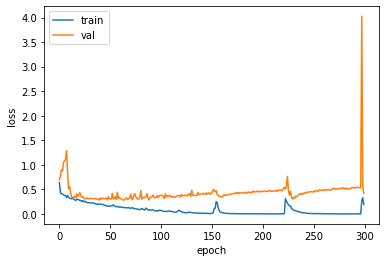

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()